# Build a Dashboard Application with Plotly Dash
# SpaceX launch data in real-time
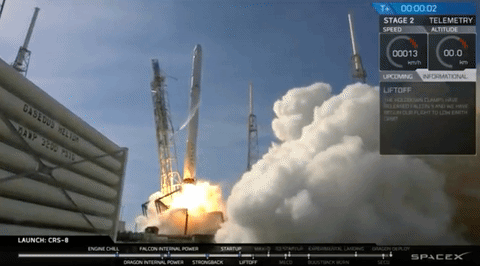
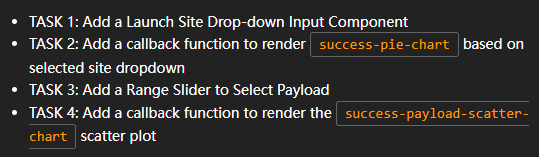

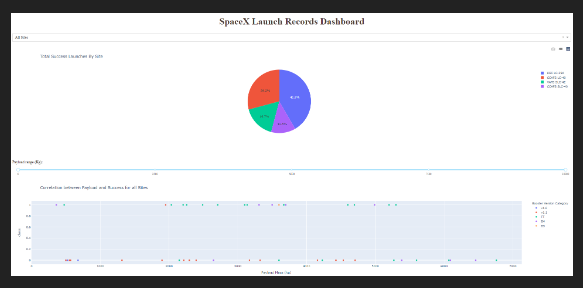

In [1]:
import pandas as pd
import dash
from dash import html,dcc
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output

In [2]:
data=pd.read_csv('datasets/spacex_launch_dash.csv')
data.head()
data2=data.groupby('Launch Site').count().reset_index()
data2

,Launch Site,Unnamed: 0,Flight Number,class,Payload Mass (kg),Booster Version,Booster Version Category
0,CCAFS LC-40,26,26,26,26,26,26
1,CCAFS SLC-40,7,7,7,7,7,7
2,KSC LC-39A,13,13,13,13,13,13
3,VAFB SLC-4E,10,10,10,10,10,10


In [8]:
app=dash.Dash(__name__)

In [9]:
app.layout=html.Div(
    children=[
        html.H1(
            'SpaceX, Launch Records Dashboard',
            style={'textAlign':'center','color':'#503D36','font-size':30}
        ),

        html.Div([
            html.Label('Select Launch Site:',style={'color':'#503D36'}),
            dcc.Dropdown(
                id='launch_site_drop',
                options=[
                    {'label':'All Sites','value':'ALL'},
                    {'label':'CCAFS LC-40','value':'CCAFS LC-40'},
                    {'label':'CCAFS SLC-40','value':'CCAFS SLC-40'},
                    {'label':'KSC LC-39A','value':'KSC LC-39A'},
                    {'label':'VAFB SLC-4E','value':'VAFB SLC-4E'},
                ],
                value='ALL',
                placeholder='select site'
                
            )
        ]),
        html.Div([
            html.Div(
               dcc.Graph(id='pie-chart')
            ),
        ]),

        html.Div([
            html.Label('Payload Mass:',style={'color':'#503D36'}),
            dcc.RangeSlider(
                id='payload-mass',
                min=0, max=10000,step=1000,
                marks={
                    0:'0',
                    2500:'2500',
                    5000:'5000',
                    7500:'7500',
                    10000:'10000',
                },
                value=[0,1000]
            )
        ]),
        html.Div([
            html.Div(
                dcc.Graph(id='scatter-chart')
            )
        ])
        
    ]
)
@app.callback(
    Output(component_id='pie-chart',component_property='figure'),
    Input(component_id='launch_site_drop',component_property='value')
)
def piechart(input_sites):
    data_site_all=data.groupby(['class','Launch Site']).count()['Flight Number'].reset_index()

    if input_sites=='ALL':
        fig=px.pie(data2,values='class',names=data2['Launch Site'], title='ALL')
        return fig
    # elif input_sites=='CCAFS LC-40':
    #     datasite1=data_site_all[data_site_all['Launch Site']=='CCAFS LC-40']
    #     fig=px.pie(datasite1,values='Flight Number',names=datasite1['class'],title='CCAFS LC-40')
    #     return fig
    # elif input_sites=='CCAFS SLC-40':
    #     datasite1=data_site_all[data_site_all['Launch Site']=='CCAFS SLC-40']
    #     fig=px.pie(datasite1,values='Flight Number',names=datasite1['class'],title='CCAFS SLC-40')
    #     return fig
    # elif input_sites=='KSC LC-39A':
    #     datasite1=data_site_all[data_site_all['Launch Site']=='KSC LC-39A']
    #     fig=px.pie(datasite1,values='Flight Number',names=datasite1['class'],title='KSC LC-39A')
    #     return fig
    # elif input_sites=='VAFB SLC-4E':
    #     datasite1=data_site_all[data_site_all['Launch Site']=='VAFB SLC-4E']
    #     fig=px.pie(datasite1,values='Flight Number',names=datasite1['class'],title='VAFB SLC-4E')
    #     return fig
    else:
        datasite1=data_site_all[data_site_all['Launch Site']==input_sites]
        fig=px.pie(datasite1,values='Flight Number',names=datasite1['class'],title=input_sites)
        return fig
        

@app.callback(
    Output(component_id='scatter-chart',component_property='figure'),
    [
        Input(component_id='launch_site_drop',component_property='value'),
        Input(component_id='payload-mass',component_property='value')
     
    ]
)
def payload_scatter(site,input_mass):
    if site=='ALL':
        fig=px.scatter(data[data['Payload Mass (kg)'].between(input_mass[0],input_mass[1])],
                       x='Payload Mass (kg)',
                       y='class',
                       color='Booster Version Category',
                       hover_data=['Launch Site'],
                       title='Correlation Between Payload and Success for All Sites'
                      )
        return fig 
    else:
        df=data[data['Launch Site']==str(site)]
        fig=px.scatter(df[df['Payload Mass (kg)'].between(input_mass[0],input_mass[1])],
                       x='Payload Mass (kg)',
                       y='class',
                       color='Booster Version Category',
                       hover_data=['Launch Site'],
                       title='Correlation Between Payload and Success for All Sites'
                      )
        return fig


app.run_server(debug=True,port=3006)

In [99]:
# data_site_all=data.groupby(['class','Launch Site']).count()['Flight Number'].reset_index()
# # data_site1
# datasite1=data_site_all[data_site_all['Launch Site']=='CCAFS LC-40']
# px.pie(datasite1,values='Flight Number',names=datasite1['class'],title='CCAFS LC-40')

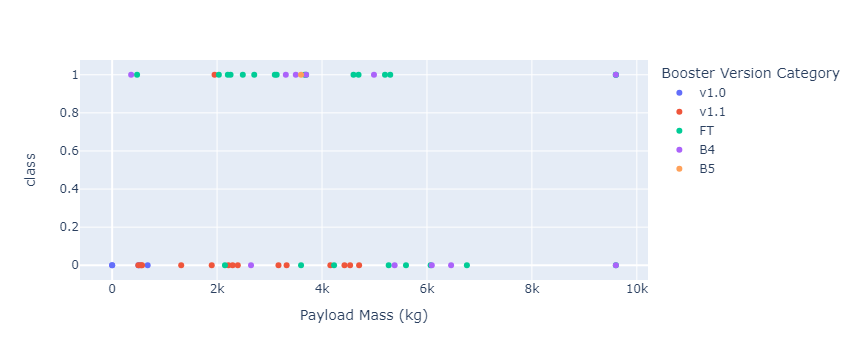

In [139]:

# px.scatter(data,x='Payload Mass (kg)',y='class',color=)
px.scatter(data,x='Payload Mass (kg)',y='class',color='Booster Version Category')